In [1]:
#!git clone https://github.com/imsaptarshi91/facial_expressions.git

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras

In [3]:
data=pd.read_csv('/Users/rishismac/facial_expressions/data/legend.csv')
data.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [4]:
data['emotion']=data['emotion'].apply(lambda x:x.lower())


In [22]:
emotions=list(data['emotion'])
images=list(data['image'])
emotions

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neut

In [6]:
images=list(data['image'])
dictionary={}
for i in range(len(data)):
    if emotions[i] in dictionary:
        dictionary[emotions[i]].append(images[i])
    else:
        dictionary[emotions[i]]=[images[i]]


In [7]:
dictionary.items()

dict_items([('anger', ['facial-expressions_2868588k.jpg', 'Alejandro_Toledo_0004.jpg', 'Alexander_Lukashenko_0001.jpg', 'Alicia_Hollowell_0001.jpg', 'Alvaro_Noboa_0002.jpg', 'Al_Gore_0002.jpg', 'Anastasia_Myskina_0001.jpg', 'Anastasia_Myskina_0003.jpg', 'Angelina_Jolie_0005.jpg', 'Arnold_Schwarzenegger_0023.jpg', 'Atal_Bihari_Vajpayee_0010.jpg', 'Ben_Braun_0001.jpg', 'Billy_Crystal_0004.jpg', 'Billy_Donovan_0001.jpg', 'Bill_Graham_0005.jpg', 'Bob_Huggins_0001.jpg', 'Bob_Huggins_0004.jpg', 'Brian_Scalabrine_0001.jpg', 'Bud_Selig_0004.jpg', 'Carlos_Arroyo_0001.jpg', 'Carlos_Ortega_0001.jpg', 'Celine_Dion_0008.jpg', 'Charles_Moose_0001.jpg', 'Charles_Moose_0002.jpg', 'Charles_Moose_0004.jpg', 'Charles_Moose_0006.jpg', 'Charles_Moose_0013.jpg', 'Colin_Powell_0007.jpg', 'Colin_Powell_0030.jpg', 'Colin_Powell_0043.jpg', 'Colin_Powell_0055.jpg', 'Colin_Powell_0149.jpg', 'Colin_Powell_0180.jpg', 'Colin_Powell_0181.jpg', 'Colin_Powell_0188.jpg', 'Colleen_Jones_0001.jpg', 'Dariusz_Michalczewski_

In [8]:
import os
os.mkdir('/Users/rishismac/Facial_Emotion')
os.mkdir('/Users/rishismac/Facial_Emotion/train')
os.mkdir('/Users/rishismac/Facial_Emotion/test')

In [9]:
emotion_list=list(dict(data['emotion'].value_counts()).keys())
emotion_list

['neutral',
 'happiness',
 'surprise',
 'sadness',
 'anger',
 'disgust',
 'fear',
 'contempt']

In [10]:
for emotion in emotion_list:
    os.mkdir(os.path.join('/Users/rishismac/Facial_Emotion/train',emotion))
    os.mkdir(os.path.join('/Users/rishismac/Facial_Emotion/test',emotion))

In [11]:
from shutil import copyfile
for emotions,images in dictionary.items():
    split_size=0.8
    train_images=images[:int(split_size*len(images))]
    test_images=images[int(split_size*len(images)):]
    for image in train_images:
        source=os.path.join('/Users/rishismac/facial_expressions/images',image)
        dest=os.path.join('/Users/rishismac/Facial_Emotion/train',emotions,image)
        copyfile(source,dest)
    for image in test_images:
        source=os.path.join('/Users/rishismac/facial_expressions/images',image)
        dest=os.path.join('/Users/rishismac/Facial_Emotion/test',emotions,image)
        copyfile(source,dest)
    

In [12]:
input_shape=(100,100,3)
num_classes=8

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [14]:
model=keras.Sequential(
[    keras.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024,activation='relu'),
    layers.Dense(num_classes,activation='softmax')]
    
                
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dropout (Dropout)           (None, 16928)             0

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [17]:
train_dir='/Users/rishismac/Facial_Emotion/train'
test_dir='/Users/rishismac/Facial_Emotion/test'

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,height_shift_range=0.1,
                                 width_shift_range=0.1,brightness_range=(0.5,1.5),zoom_range = [1, 1.5])
train_genarator=train_datagen.flow_from_directory(
                    train_dir,target_size=(100,100),color_mode='rgb',class_mode='categorical')
test_datagen=ImageDataGenerator(rescale=1.0/255)
test_genarator=test_datagen.flow_from_directory(
                    test_dir,target_size=(100,100),color_mode='rgb',class_mode='categorical')


Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [19]:
history=model.fit(train_genarator,epochs=20,verbose=1,validation_data=test_genarator)

Epoch 1/20
342/342 [==============================] - 87s 252ms/step - loss: 1.0302 - accuracy: 0.5425 - val_loss: 1.3362 - val_accuracy: 0.5605
Epoch 2/20
342/342 [==============================] - 68s 197ms/step - loss: 0.8841 - accuracy: 0.6281 - val_loss: 1.5677 - val_accuracy: 0.5817
Epoch 3/20
342/342 [==============================] - 74s 217ms/step - loss: 0.8325 - accuracy: 0.6620 - val_loss: 1.6363 - val_accuracy: 0.6021
Epoch 4/20
342/342 [==============================] - 73s 213ms/step - loss: 0.7821 - accuracy: 0.6947 - val_loss: 1.5338 - val_accuracy: 0.6145
Epoch 5/20
342/342 [==============================] - 74s 216ms/step - loss: 0.7317 - accuracy: 0.7138 - val_loss: 1.8801 - val_accuracy: 0.6123
Epoch 6/20
342/342 [==============================] - 75s 219ms/step - loss: 0.7012 - accuracy: 0.7385 - val_loss: 2.2554 - val_accuracy: 0.6225
Epoch 7/20
342/342 [==============================] - 76s 221ms/step - loss: 0.6671 - accuracy: 0.7544 - val_loss: 2.2653 - val_ac

In [20]:
history=pd.DataFrame(history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.030226,0.542546,1.336156,0.560540
1,0.884118,0.628096,1.567662,0.581692
2,0.832496,0.662005,1.636334,0.602115
3,0.782093,0.694726,1.533810,0.614515
4,0.731678,0.713829,1.880149,0.612327
5,0.701178,0.738507,2.255361,0.622538
6,0.667057,0.754410,2.265252,0.633115
7,0.629333,0.774792,2.490253,0.636397
8,0.611367,0.783018,2.231677,0.638585
9,0.590703,0.791975,2.344319,0.651349


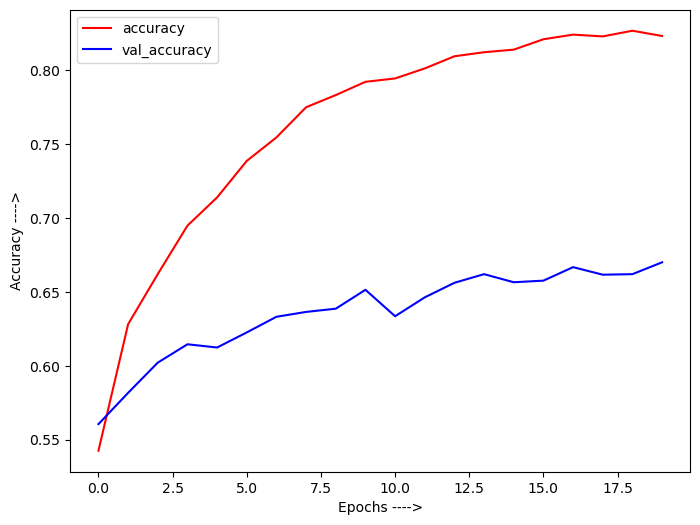

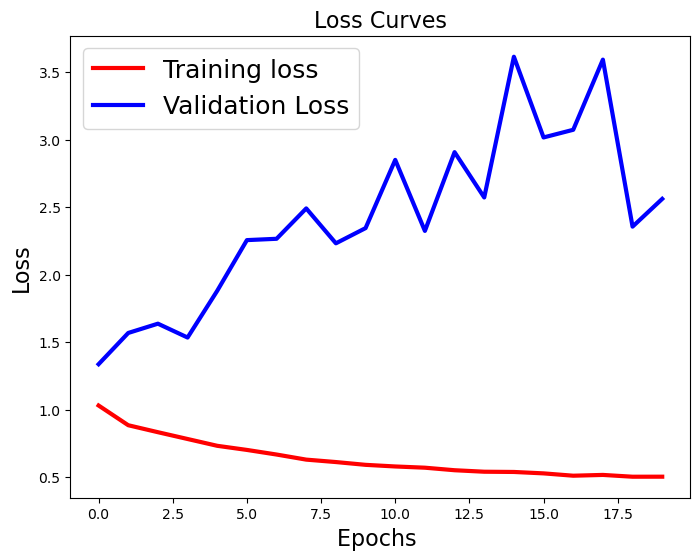

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history['accuracy'],color='red')
plt.plot(history['val_accuracy'],color='blue')
plt.xlabel('Epochs ---->')
plt.ylabel('Accuracy ---->')
plt.legend(['accuracy','val_accuracy'])

plt.figure(figsize=(8,6))
plt.plot(history['loss'],'r',linewidth=3.0)
plt.plot(history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()
